# Exercise 1: Basic image processing

In [3]:
from UZ_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt

### a) Display the picture umbrellas.jpg

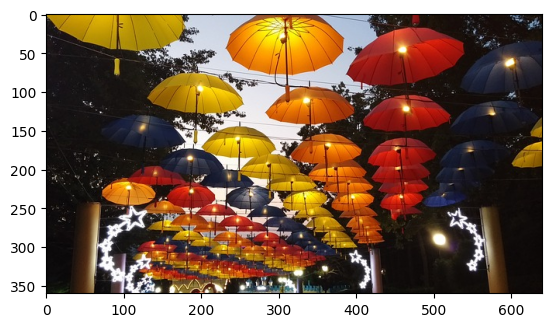

In [4]:
I = imread("images/umbrellas.jpg")
imshow(I)

In [5]:
height, width, channels = I.shape
print(height, width, channels, I.dtype)

360 640 3 float64


### b) Convert the loaded image to greyscale

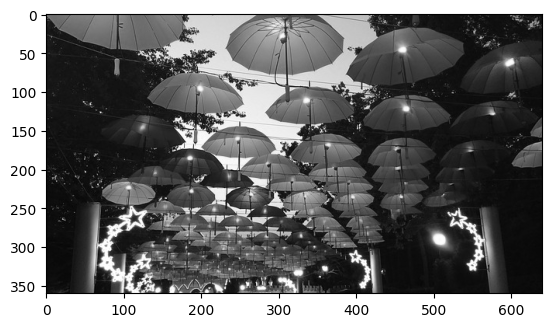

In [6]:
for i in range(I.shape[0]):             # height
    for j in range(I.shape[1]):         # width
        sum = 0
        
        for k in range(I.shape[2]):     # rgb values
            sum += I[i, j, k]
        average = float(sum / 3)

        for k in range(I.shape[2]):     # write the avereage value back
            I[i, j, k] = average
imshow(I)

### c) Cut and display a specific part of the loaded image

Q: Why would you use different color maps? \
A: They allow for more efficient processing and sometimes help to hide unnecessary details or uncover things that we wouldn't see if we weren't able to change color maps. For example when we only care about a shape of an object, the RGB color map doesn't make much sense, as it is easier to process the image in greyscale. 

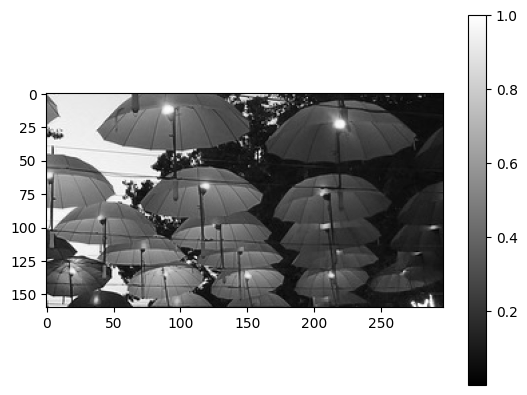

In [7]:
cutout = I[100:260, 245:542, 0]
imshow(cutout)
#plt.imshow(cutout, cmap="gray")

### d) Write a script that inverts a rectangular part of the image

Q: How is inverting a greyscale value defined for uint8? \
A: It is defined as subtracting the value from 255

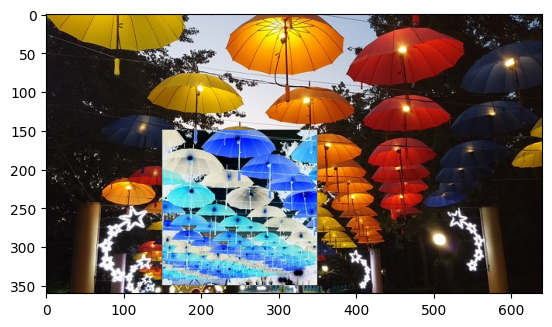

In [8]:
I = imread("images/umbrellas.jpg")

for i in range(150, 350):
    for j in range(150, 350):
        for k in range(I.shape[2]):
            I[i,j,k] = 1 - I[i,j,k]
plt.imshow(I)

### e) Perform a reduction of grayscale levels in the image

Text(0.5, 1.0, 'Reduced greyscale')

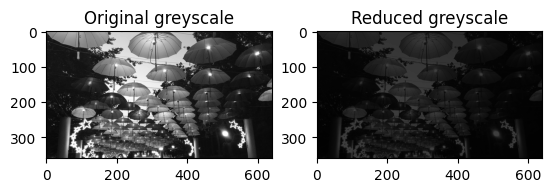

In [9]:
I = cv2.imread("images/umbrellas.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = I.astype(np.float64)

original = np.copy(I)

for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        I[i,j] = I[i,j] / 255 * 63

plt.subplot(1,2,1)
plt.imshow(original)
plt.title("Original greyscale")

plt.subplot(1,2,2)
plt.imshow(I, vmax=255)
plt.title("Reduced greyscale")


# Exercise 2: Thresholding and histograms

In [10]:
img = cv2.imread("images/bird.jpg")

### a) Create a binary mask from a grayscale image

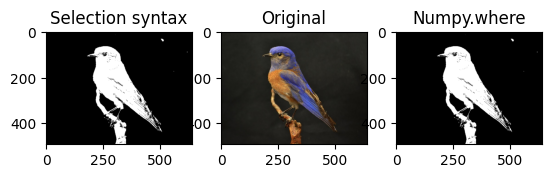

In [11]:
img = cv2.imread("images/bird.jpg")
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.copy(img)

threshold = 47

# Numpy indexing
positive_mask = img > threshold
negative_mask = img <= threshold

img[positive_mask] = 1
img[negative_mask] = 0

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Selection syntax")

plt.subplot(1,3,2)
plt.imshow(original)
plt.title("Original")

# Numpy.where
img2 = np.where(img2 > threshold, 1, 0)
plt.subplot(1,3,3)
plt.imshow(img2)
plt.title("Numpy.where")

plt.show()

### b) Write a function that accepts a grayscale image and the number of bins that will be used in building a histogram. The function should return a 1D array representing the image histogram.

Q: The histograms are usually normalized by dividing the result by the sum of all cells. Why is that? \
A: To adjust the scale of levels of gray and get a better representation of color composition of the image. Normalization also provides us with the probability distribution of some pixel value

<BarContainer object of 128 artists>

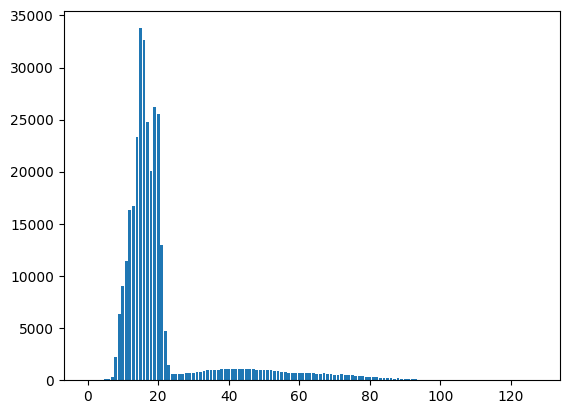

In [12]:
img = cv2.imread("images/bird.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def myhist(img, n_bins):
    H = np.zeros(n_bins)
    interval_step = 256 // n_bins

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H[min(img[i, j] // interval_step, n_bins-1)] += 1

    return H

H1 = myhist(img, n_bins=128)
tags = np.array([int(i) for i in range(len(H1))])
plt.bar(tags, H1)

# Normalized histogram 
#H = H / np.linalg.norm(H)
#plt.bar(tags, H) 

### c) Modify your function myhist to no longer assume the uint8 range for values. Instead, it should find the maximum and minimum values in the image and calculate the bin ranges based on these values. Write a script that shows the difference between both versions of the function

[ 0 , 254 ] n_bins: 20 step: 13


Text(0.5, 1.0, 'modified_hist')

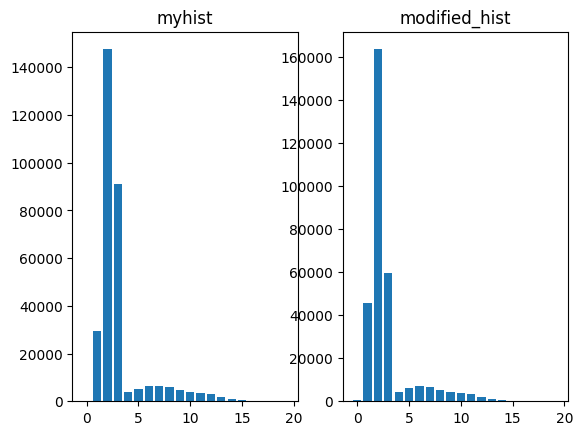

In [13]:
def modified_hist(img, n_bins):
    # Prepare histogram array
    H = np.ones(n_bins)

    # Find min and max
    a_max = np.max(img)
    a_min = np.min(img)

    # Get step based on n_bins and range
    step = int(np.ceil((a_max - a_min) / n_bins))
    print("[", a_min,",", a_max, "] n_bins:", n_bins, "step:", step)

    # Calculate histogram
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H[min(img[i,j] // step, n_bins-1)] += 1
    
    return H

H1 = myhist(img, n_bins=20)
H2 = modified_hist(img, n_bins=20)
tags = np.array([int(i) for i in range(len(H1))])

# Displays 2 bar charts on top of each other
#plt.bar(tags, H1)
#plt.bar(tags, H2)

# Display 2 bar charts one by the other
plt.subplot(1,2,1)
plt.bar(tags, H1)
plt.title("myhist")


plt.subplot(1,2,2)
plt.bar(tags, H2)
plt.title("modified_hist")

### d) Test myhist on images (three or more) of the same scene in different lighting conditions.

In [14]:
# TODO - load 3 pictures of same scene and display histograms with myhist

### e) Implement Otsu's method for automatic threshold calculation. It should accept a grayscale image and return the optimal threshold (use normalized histograms). Write a script that shows the algorithm's results on different images

In [20]:
def normalize(H):
    return H / np.linalg.norm(H)

def otsu(H):
    # Normalize histogram
    H = normalize(H)

    # Get clusters
    cluster1 = []
    cluster2 = []

    thresh = 0

    for i in range(1, len(H)-1):
        cluster1 = H[:i]
        cluster2 = H[i+1:]

        # Get cumulative probabilities
        w1 = np.sum(cluster1)
        w2 = np.sum(cluster2)

        # Get cluster means
        mean1 = np.mean(cluster1)
        mean2 = np.mean(cluster2)

        print(mean1, mean2, i)

        # Minimize within-class variance or maximize between-class variance
        o1, o2 = 0, 0
        for j in range(i):
            o1 += np.square(j - mean1) * (H[j] / w1)
            o2 += np.square(i+j - mean2) * (H[i+j] / w2)

        print

        if o1 > thresh:
            thresh = o1

        if o2 > thresh:
            thresh = o2

        return thresh



otsu_threshold = otsu(H1)



0.0018140445857362127 0.0897479662495223 1


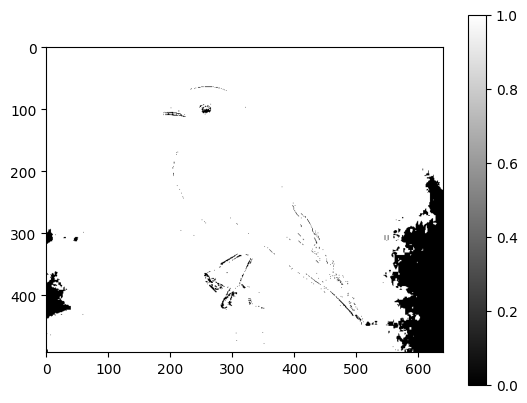

In [31]:
img = cv2.imread("images/bird.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(np.float64) / 255


img = np.where(img > otsu_threshold, 1, 0)

imshow(img)